<a href="https://colab.research.google.com/github/EmperorNao/MLHub/blob/main/DLS/sem1/HW3/CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Загрузка датасета

In [78]:
!wget -O train.csv https://vk.com/doc209646771_632063537?hash=72705ee81cb683817b&dl=474cf35459f17f62ca
!wget -O test.csv https://vk.com/doc209646771_632063527?hash=59a58055c24a70d69f&dl=cbee47200e26df8667
!wget -O submission.csv https://vk.com/doc209646771_632063530?hash=c117ba1d00a374c43b&dl=e4ed277865d5bed7f0

--2022-03-05 16:58:05--  https://vk.com/doc209646771_632063537?hash=72705ee81cb683817b
Resolving vk.com (vk.com)... 93.186.225.208, 87.240.139.194, 87.240.137.158, ...
Connecting to vk.com (vk.com)|93.186.225.208|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://psv4.userapi.com/c237231/u209646771/docs/d38/26ffad01c6a6/train.csv?extra=wK3CYW57yKdeaYUYF0C2Rf4v3ZUbcZEEEfjv-oDDWMJx1mCaa-NgefpUk2l-vbeA0bRdL9VrpmmLgUQI3O7Ua-O21_xb-aWa35zvNwFm4s9Z_38VsTLLzZssyFMWU3Q2fXtvBlwqkcri&dl=1 [following]
--2022-03-05 16:58:06--  https://psv4.userapi.com/c237231/u209646771/docs/d38/26ffad01c6a6/train.csv?extra=wK3CYW57yKdeaYUYF0C2Rf4v3ZUbcZEEEfjv-oDDWMJx1mCaa-NgefpUk2l-vbeA0bRdL9VrpmmLgUQI3O7Ua-O21_xb-aWa35zvNwFm4s9Z_38VsTLLzZssyFMWU3Q2fXtvBlwqkcri&dl=1
Resolving psv4.userapi.com (psv4.userapi.com)... 87.240.137.134, 87.240.137.140, 87.240.190.76, ...
Connecting to psv4.userapi.com (psv4.userapi.com)|87.240.137.134|:443... connected.
HTTP request sent, awaiting res

## Seedимся

In [232]:
SEED = 42

np.random.seed(42)

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [79]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [80]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [144]:
data = pd.read_csv('./train.csv')

In [145]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [146]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4469,72,104.80,7470.1,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),0
4053,2,19.90,57.4,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,0
5060,17,65.75,1111.2,Male,0,No,No,Yes,Yes,DSL,Yes,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
5070,12,79.95,1043.4,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),0
2766,24,84.85,2048.8,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0


In [147]:
print(f"Количество объектов: {len(data)}\n")
data.info()

Количество объектов: 5282

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-n

### Наблюдаем, что данные чистые ... на первый взгляд

Но не совсем. В дальнейшем обнаруживается, что есть значения ' ' в num_cols (TotalSpent)

Кажется, что 9 объектов легче выкинуть, чем пытаться кодировать пропущенные значения

In [148]:
print("NaN")
print((data.isna()).sum())

print()

print("Пустые строки и пробелы")
print(((data == ' ') | (data == '')).sum())

NaN
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пустые строки и пробелы
ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             

In [160]:
data = data[data != ' ']
data = data.dropna()

data['TotalSpent'] = data['TotalSpent'].astype('float64')

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

## Численные фичи

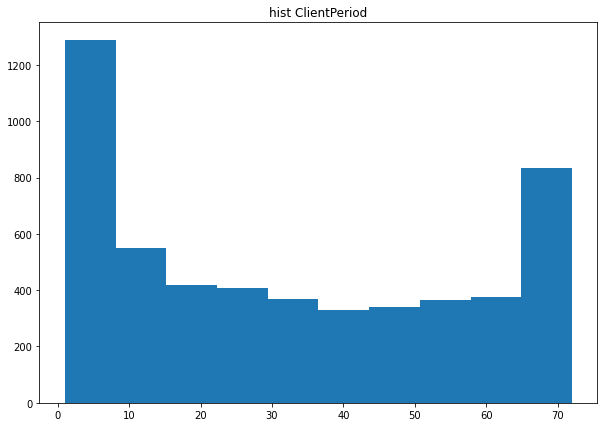

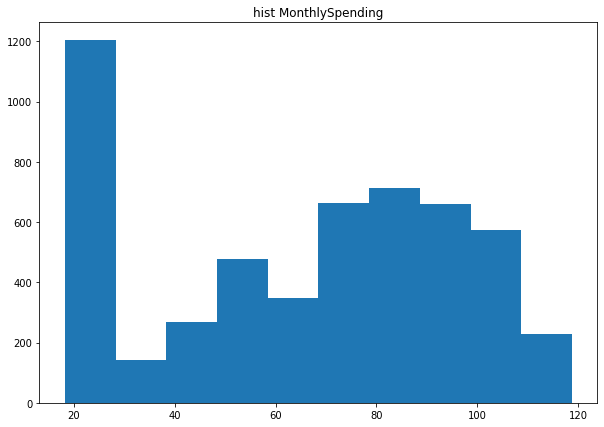

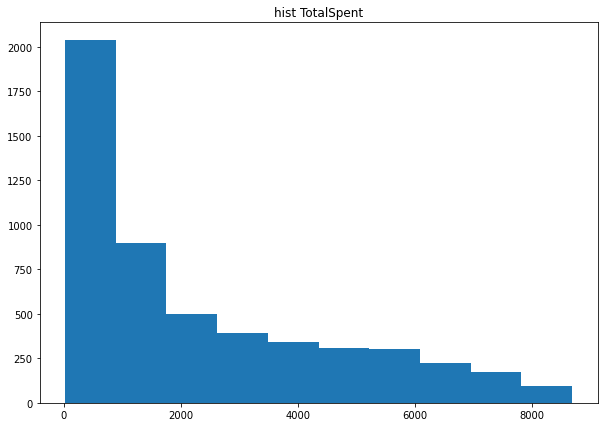

In [162]:
for col in num_cols:

    plt.figure(figsize=(10, 7))
    plt.title("hist " + col)
    plt.hist(data[col])
    plt.show()

## Категориальные фичи

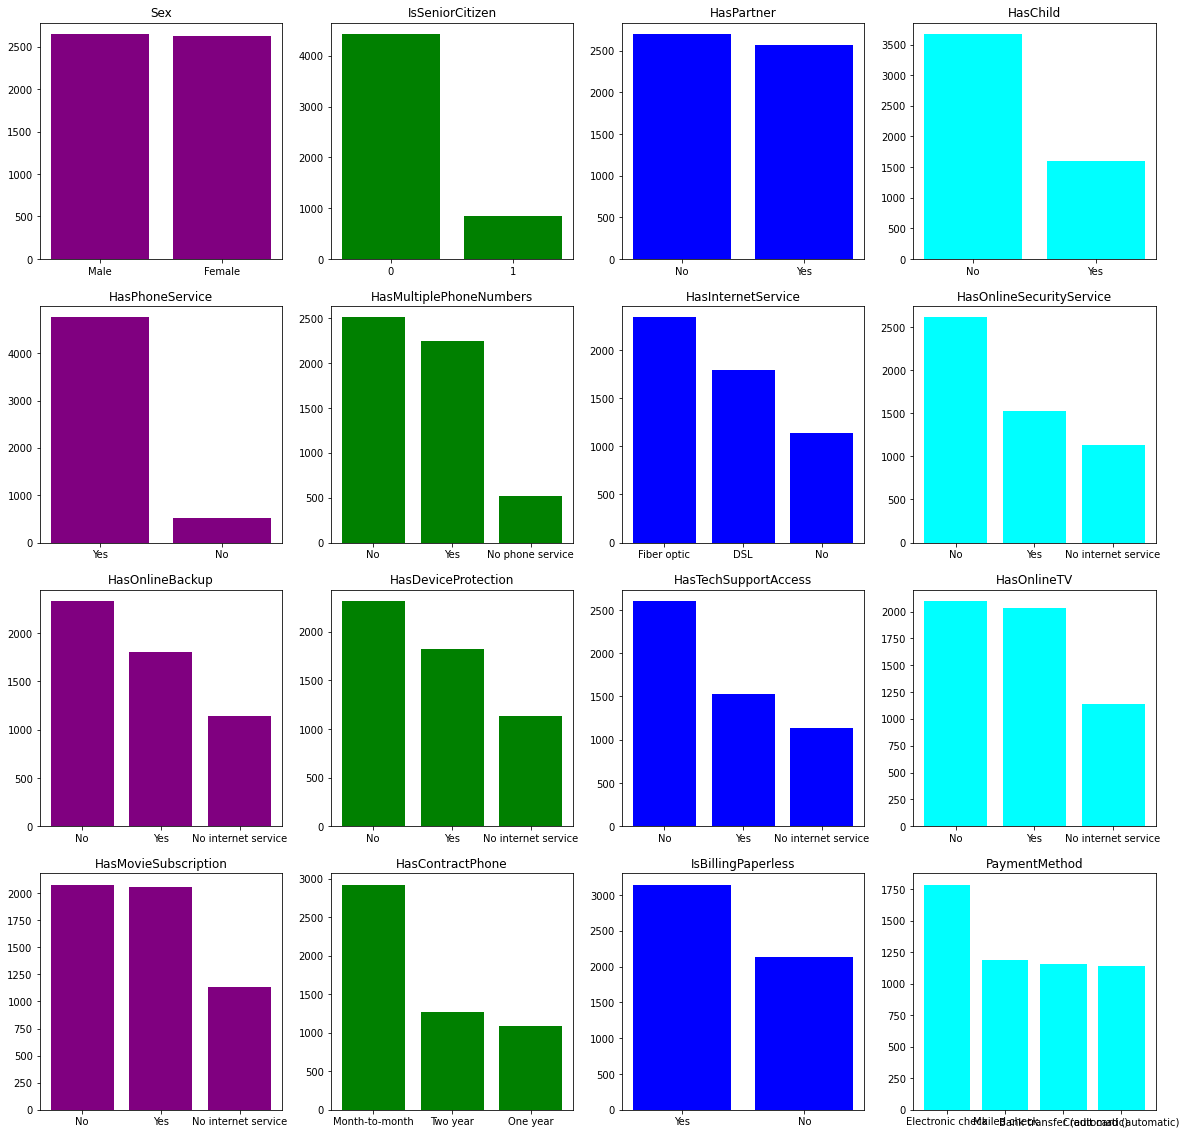

In [163]:
from math import ceil

n_cat_cols = len(cat_cols)

ncols = 4
nrows = ceil(n_cat_cols / 4)


colors = ['purple', 'green', 'blue', 'cyan']

plt.figure(figsize = (5 * nrows, 5 * ncols))
for index, col in enumerate(cat_cols):

    plt.subplot(nrows, ncols, index + 1)
    plt.title(col)

    d = data[col].value_counts()
    plt.bar(list(d.index), list(d.values), tick_label=list(d.index), color=colors[index % len(colors)])

plt.show()

## Таргет

### Видим дизбаланс, меток 0 больше чем 1

<BarContainer object of 2 artists>

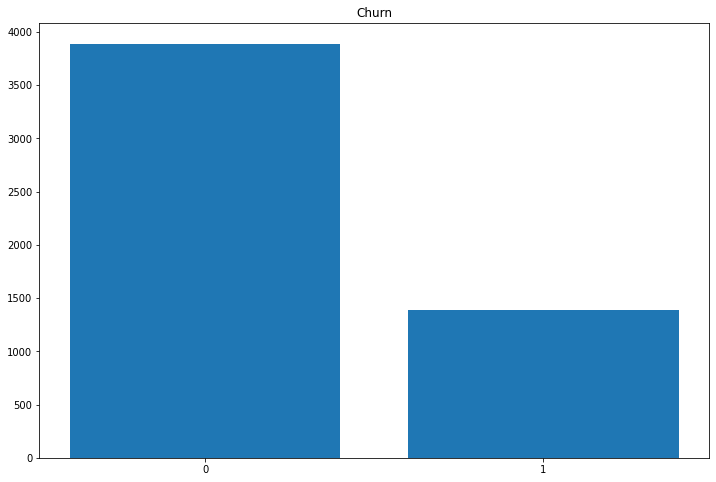

In [164]:
plt.figure(figsize = (12, 8))

plt.title(target_col)
d = data[target_col].value_counts()
plt.bar(list(d.index), list(d.values), tick_label=list(d.index))

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### Пока что ничего не придумал дополнительно

In [243]:
X = data[feature_cols]
y = data[target_col]

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [244]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [263]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [245]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


In [246]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state=SEED))]
)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

pipeline.fit(X_train, y_train)
print("Скор простой линейки: %.4f" % roc_auc_score(y_test, pipeline.predict(X_test)))

Скор простой линейки: 0.7145


##Теперь попробуем CV

In [256]:
parameters = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

In [269]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state=SEED, solver='saga'))]
)

In [270]:
search = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', verbose=1, n_jobs =-1)
search.fit(X, y)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
             

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [273]:
clf = search.best_estimator_
print(f"Лучший скор: {search.best_score_}")
print(f"Лучшие параметры: {search.best_params_}")

Лучший скор: 0.844827370696579
Лучшие параметры: {'classifier__C': 100.0, 'classifier__class_weight': None, 'classifier__l1_ratio': 0.1, 'classifier__penalty': 'elasticnet'}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

## Сплитим датасет на будущее

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

## Устанавливаем и учим дефолт

In [276]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [298]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [299]:
default = CatBoostClassifier(random_seed=SEED)

In [300]:
default.fit(X_train, y_train, cat_features=cat_cols, verbose=False)

print(f"Скор дефолта: {roc_auc_score(y_test, default.predict(X_test))}")

Скор дефолта: 0.7103326256192498


## Дефолтное значение разочаровывает, ожидаешь 80+, а по итогу скор как у линейки :(

Значит, нужно пробовать перебор и пробивать 90+ (I believe in Yandex and CB supremacy ^) )



In [311]:
superCB = CatBoostClassifier(random_seed=SEED, cat_features=cat_cols)

In [315]:
parameters = {
    'iterations': [100, 1000, 3000, 5000, 10000],
    'learning_rate': [1e-3, 1e-2, 1e-1, 0.03, 0.05, 0.1],
    'l2_leaf_reg': [1e-1, 1, 3, 5, 10],
    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],
    'bagging_temperature': [0.1, 0.3, 0.5, 1, 3, 5, 10, 100],
    'subsample': [0.5, 0.6, 0.66, 0.8],
    'sampling_frequency': ['PerTree', 'PerTreeLevel'],
    'depth': [5, 6, 8, 10, 13, 16],
    'grow_policy': ['Depthwise', 'Lossguide'],
    'min_data_in_leaf': [1, 3, 5, 10, 20],
    'auto_class_weights': ['Balanced', 'SqrtBalanced'],
    'border_count':[32,5,10,20,50,100,200],
    'ctr_border_count':[50,5,10,20,100,200]
}

In [ ]:
grid_search_result = superCB.grid_search(parameters, cv=5, X=X, y=y, verbose=True, plot=True, partition_random_seed=SEED)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.